In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def get_plot_dic(image, title="", cmap=None):
    d = {
            "image" : image,
            "title": title,
            "cmap": cmap
        }
    return d

def plot_multiple_images(list_image_title_cmap, columns, rows, figsize=(18, 24)):
    """
    This fuction will be used for plot multiple images
    list_image_title is list of dictionary.
    dict = {
        "image": np.ndarray,
        "tilte": string (optional, default is ""),
        "cmap": string (optional, default is None)
    }
    """
    num_images = len(list_image_title_cmap)
        
    fig = plt.figure(figsize=figsize)
    # ax enables access to manipulate each of subplots
    ax = []
    for i in range(num_images):
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title(list_image_title_cmap[i].get('title', ""))
        plt.imshow(list_image_title_cmap[i]['image'], cmap = list_image_title_cmap[i].get('cmap', None))
    plt.show()
    
    return

In [9]:
def corners_unwarp(img, nx, ny, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret:
        cv2.drawChessboardCorners(undist, (nx,ny), corners, ret)
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        offset = 100 # offset of dist point
        img_size = (gray.shape[1], gray.shape[0])
        dst = np.float32([(offset, offset), (img_size[0]-offset, offset), 
                           (img_size[0]-offset, img_size[1]-offset), (offset, img_size[1]-offset)])
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(undist, M, img_size)
        
    return warped, M
    

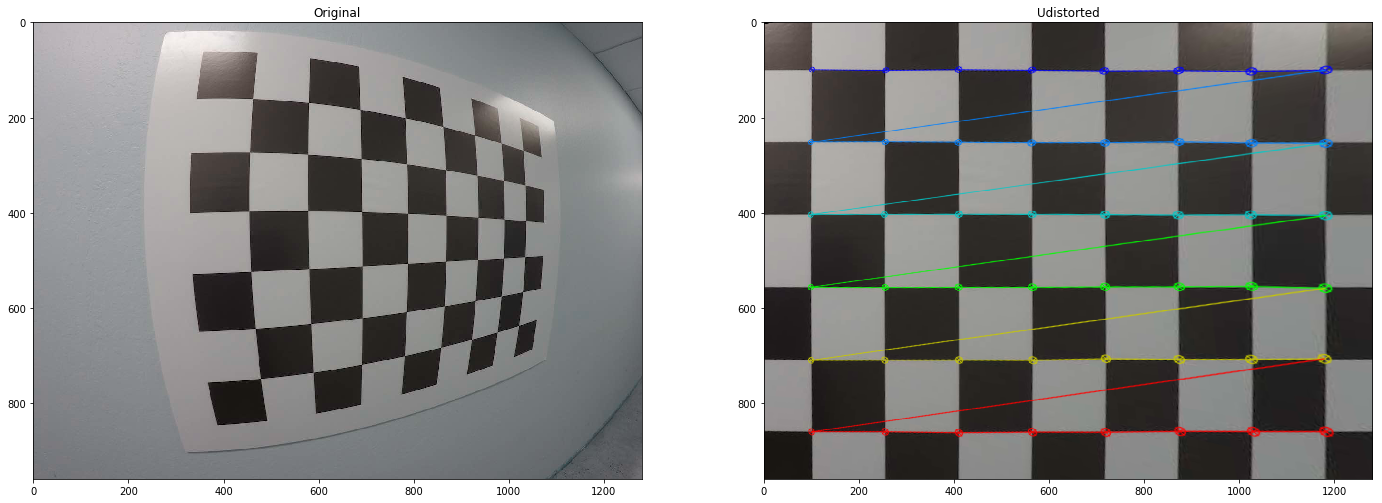

In [10]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "calibration_wide/wide_dist_pickle2.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('calibration_wide/test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
images = []
images.append(get_plot_dic(img, title="Original", cmap=None))
images.append(get_plot_dic(top_down, title="Udistorted", cmap=None))
plot_multiple_images(list_image_title_cmap=images, columns=2, rows=1, figsize=(24, 32))